In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import flowkit as fk
import numpy as np
import os
import random
from sklearn import preprocessing
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
random.seed(100)

In [3]:

result_list={}
file_path= r"C:\Users\bruno\OneDrive\Desktop\Programmer\viSNE_maps_and_data\Data\Data_Xinje\Some Data from Xinjie Project\Algae and microplastics"
# listdir
files_in_path = os.listdir(file_path)


In [4]:
#does not work right now
subsampling_number = 100
def random_subsampling(flow_frame, num_samples=subsampling_number):
    num_events = len(flow_frame)
    if num_samples >= num_events:
        return flow_frame
    else:
        sampled_indices = random.sample(range(num_events), num_samples)
        return flow_frame.iloc[sampled_indices, :]

In [8]:
# id data is in fcs format

session = fk.Session(gating_strategy=None,fcs_samples=files_in_path)
samplelist = session.get_sample_ids()
asinh_transform = fk.transforms.AsinhTransform("asinh",param_t=262144, param_a=0,param_m=150)
session.analyze_samples(samplelist)

FileNotFoundError: [Errno 2] No such file or directory: '3B-1-2023-04-10-153101-9 A_e.csv'

In [ ]:
# id data is in csv



In [13]:
all_events_as_df_from_one_id = session.get_gate_events(sample_id=session.get_sample_ids()[1])
result_df = all_events_as_df_from_one_id.filter(like='A', axis=1)
col = pd.DataFrame(result_df.columns).T

In [6]:
norm_array = pd.DataFrame(preprocessing.normalize(result_df))
arr = pd.concat([col,norm_array],axis=0)

In [7]:
perplexity_value = 250

tsne_result = TSNE(n_components=2, perplexity=perplexity_value, verbose=True).fit_transform(norm_array)



[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...
[t-SNE] Computed neighbors for 10000 samples in 1.826s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.053054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.694717
[t-SNE] KL divergence after 1000 iterations: 0.842651


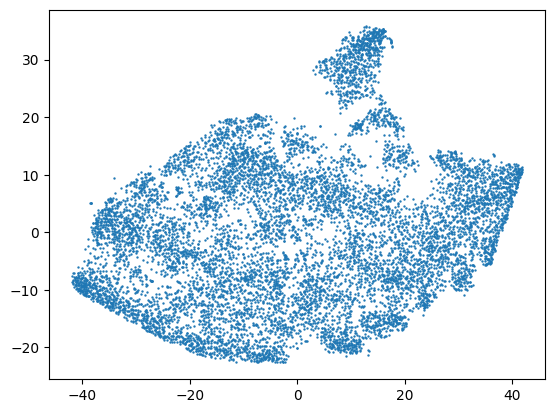

In [8]:

fig, ax = plt.subplots()
x= tsne_result[:, 0]
y= tsne_result[:, 1]
scatter = ax.scatter(x,y,s=0.5)

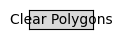

In [9]:
# Initialize a list to store the vertices of the drawn polygons
polygons = []

# Initialize a list to store the indices of points within each polygon
polygon_indices = []

# Create a scatter plot with multiple points


# Define a function to be called when a polygon is drawn
def onselect(vertices):
    global polygons, polygon_indices
    # Create a polygon patch for visualization
    polygon_patch = plt.Polygon(vertices, closed=True, fill=None, edgecolor='yellow')
    ax.add_patch(polygon_patch)

    # Add the polygon vertices to the list
    polygons.append(vertices)

    # Check if each point is inside the drawn polygon
    path = Path(vertices)
    selected_indices = []
    for i in range(len(x)):
        if path.contains_point((x[i], y[i])):
            selected_indices.append(i)

    # Add the indices of the points inside the polygon to the list
    polygon_indices.append(selected_indices)

    print("Selected point indices:", selected_indices)

# Create a PolygonSelector widget
polygon_selector = PolygonSelector(ax, onselect)

# Define a function to clear all polygons and indices
def clear_polygons(event):
    global polygons, polygon_indices
    for polygon in polygons:
        ax.patches.remove(polygon)
    polygons = []
    polygon_indices.clear()
    plt.draw()

# Create a button to clear all polygons and indices
clear_button = plt.axes([0.85, 0.01, 0.1, 0.04])
clear_button_obj = plt.Button(clear_button, 'Clear Polygons')
clear_button_obj.on_clicked(clear_polygons)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interactive Point Selection')

# Show the interactive plot
plt.show()

# Print the list of selected point indices after closing the plot
print("Polygon indices:", polygon_indices)
plt.close()